In [53]:
%matplotlib inline
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

## Read the Dataset

In [54]:
data = loadmat('ex6data1.mat')
x = data['X']
y = data['y'].reshape(-1)

# Split dataset for train and test

In [55]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.3)

## Plot the data

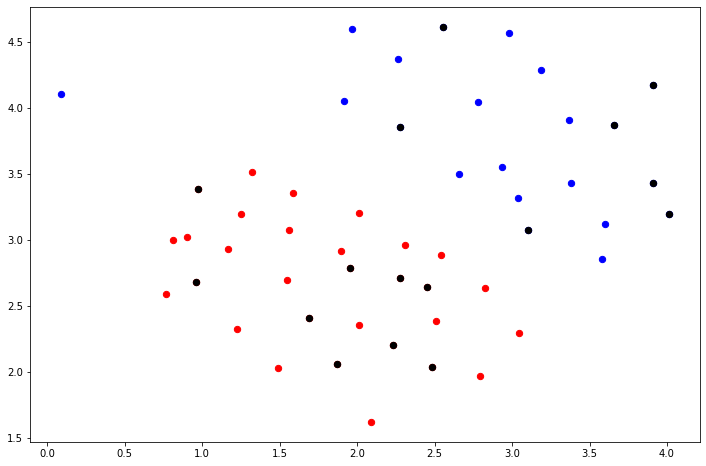

In [56]:
def plotData():
    plt.subplots(figsize=(12,8))
    for i in range(len(x)):
        if y[i] == 0: plt.scatter(x[i][0], x[i][1], c='red', s=40)
        elif y[i] == 1: plt.scatter(x[i][0], x[i][1], c='blue', s=40)
    for i in range(len(xTest)):
        plt.scatter(xTest[i][0], xTest[i][1], c='black', s=40)
    plt.show()
    
plotData()

#### Create and Visualize kNN

<Figure size 432x288 with 0 Axes>

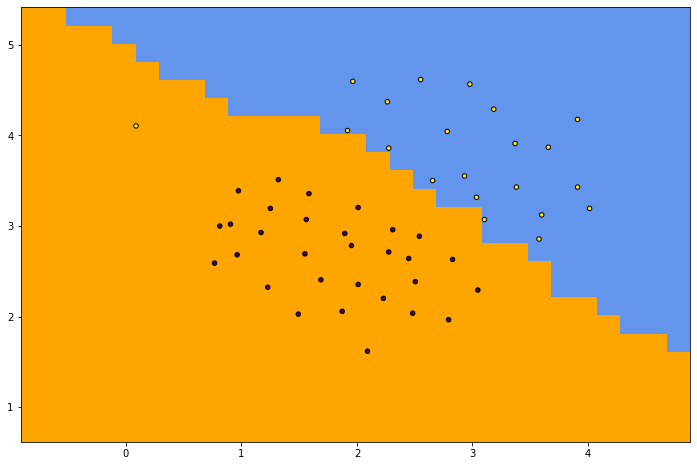

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xTrain, yTrain)
yPrediction = knn.predict(xTest)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.subplots(figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=20)

## Compute accuracy

In [58]:
knnAccuracy = metrics.accuracy_score(yTest, yPrediction) * 100
print("Accuracy: {0}%".format(knnAccuracy))

Accuracy: 100.0%


## Create LinearSVC and train your data

In [59]:
mySVM = svm.SVC(kernel='linear', random_state=1, gamma=0.2, C=1.0)
mySVM.fit(xTrain, yTrain)
ySVMPrediction = mySVM.predict(xTest)

## Compute accuracy

In [60]:
svmAccuracy = metrics.accuracy_score(yTest, ySVMPrediction) * 100;
print("Accuracy: {0}".format(svmAccuracy))

Accuracy: 100.0


# Visualize the Decision Boundary

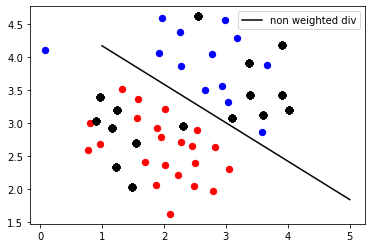

In [61]:
w = mySVM.coef_[0]
#print(w)

a = -w[0] / w[1]

xx = np.linspace(1,5)
yy = a * xx - mySVM.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], c='red', s=40)
    elif y[i] == 1:
        plt.scatter(x[i][0], x[i][1], c='blue', s=40)
    for i in range(len(X_test)):
        plt.scatter(X_test[i][0], X_test[i][1], c='black', s=40)
plt.legend()
plt.show()